In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Chap 10. 비지도 학습 알고리즘
- 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주. 입력값에 대한 목표치가 주어지지 않는다

## 10-1 차원축소
- 높은 차원의 데이터는 계산비용이 높으며, 데이터의 노이즈가 있을 수 있다.
- Feature selection, feature extraction, clustering

### 주성분분석
- 수치형 변수의 공변성 잡아내기
- 다차원 데이터를 분산이 큰 방향에서부터 순서대로 축을 다시 잡는 방법
- 변수간 종속성이 클 수록 더 소수의 주성분으로 데이터 표현 가능
- 각 특징이 정규분포를 따른다는 가정이 있어, 왜곡된 분포를 가진 변수를 이용하면 적절하지 않다.
- 특징들의 척도가 상이할 경우 올바른 주성분 방향을 찾을 수 없어 변수변환 필요

[장단점]
- 고차원 데이터를 손실을 최소화하면서 효율적으로 축소
- 그래프의 두 축을 해석하기 쉽지 않으며, 비선형구조 반영 불가능

feature 13개, data 178개
고유값 요약: 
         eigenvalue       기여율     누적기여율
comp1     4.732437  0.361988  0.361988
comp2     2.511081  0.192075  0.554063
comp3     1.454242  0.111236  0.665300
comp4     0.924166  0.070690  0.735990
comp5     0.858049  0.065633  0.801623
comp6     0.645282  0.049358  0.850981
comp7     0.554141  0.042387  0.893368
comp8     0.350466  0.026807  0.920175
comp9     0.290512  0.022222  0.942397
comp10    0.252320  0.019300  0.961697
comp11    0.227064  0.017368  0.979066
comp12    0.169724  0.012982  0.992048
comp13    0.103962  0.007952  1.000000 



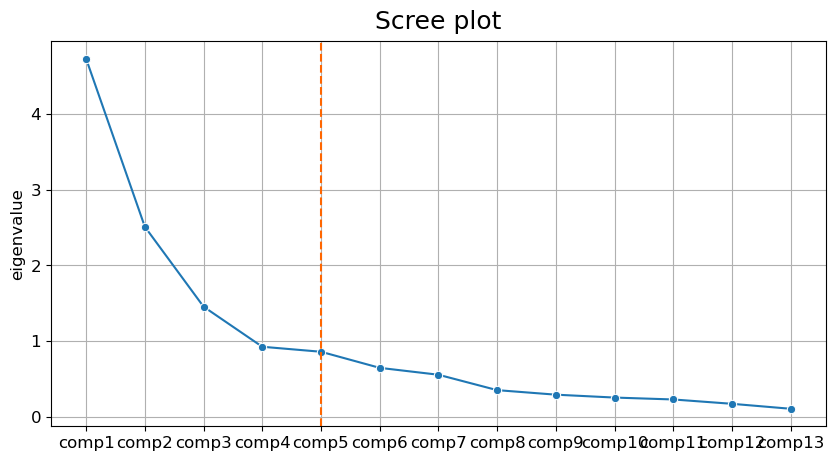

In [7]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

model = PCA(n_components=X.shape[1], svd_solver='auto')
model.fit(scaled_X)

e_value = pd.DataFrame({"eigenvalue":model.explained_variance_, '기여율':model.explained_variance_ratio_},
                      index=['comp%s' %i for i in range(1, X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print(f"고유값 요약: \n {e_value} \n")

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x=e_value.index, y='eigenvalue', marker='o', data=e_value, ax=ax)
ax.grid()
ax.set_title("Scree plot", fontsize=18, pad=9)
for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim = i+1
        break
plt.show()

고유벡터 요약:
         alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
comp1  0.144329   -0.245188 -0.002051          -0.239320   0.141992
comp2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634
comp3 -0.207383    0.089013  0.626224           0.612080   0.130757
comp4 -0.017856    0.536890 -0.214176           0.060859  -0.351797
comp5 -0.265664    0.035214 -0.143025           0.066103   0.727049 



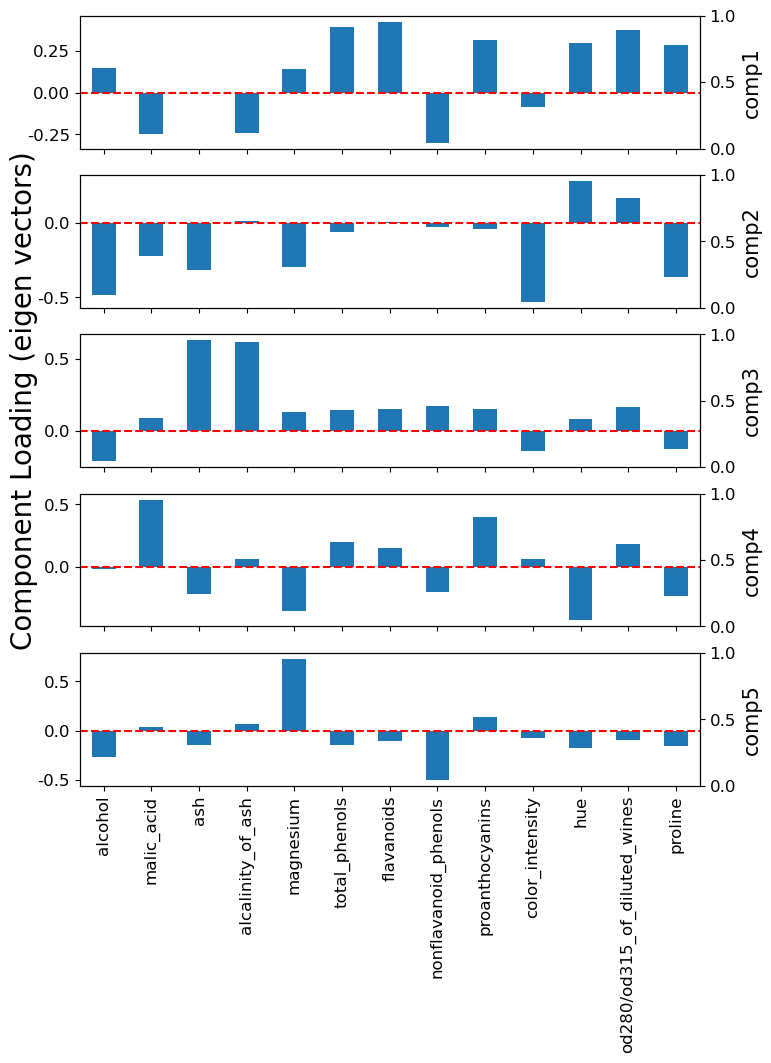

In [11]:
model = PCA(n_components=best_dim, svd_solver='auto')
model.fit(scaled_X)
PCA_result = model.fit_transform(scaled_X)

e_vector = pd.DataFrame(model.components_, index=['comp%s'%i for i in range(1, best_dim+1)], columns=scaled_X.columns)
print("고유벡터 요약:\n", e_vector.iloc[:, :5], "\n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    e_vector.iloc[i,:].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([" " for i in range(len(e_vector.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (eigen vectors)", fontsize=20)
plt.show()

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


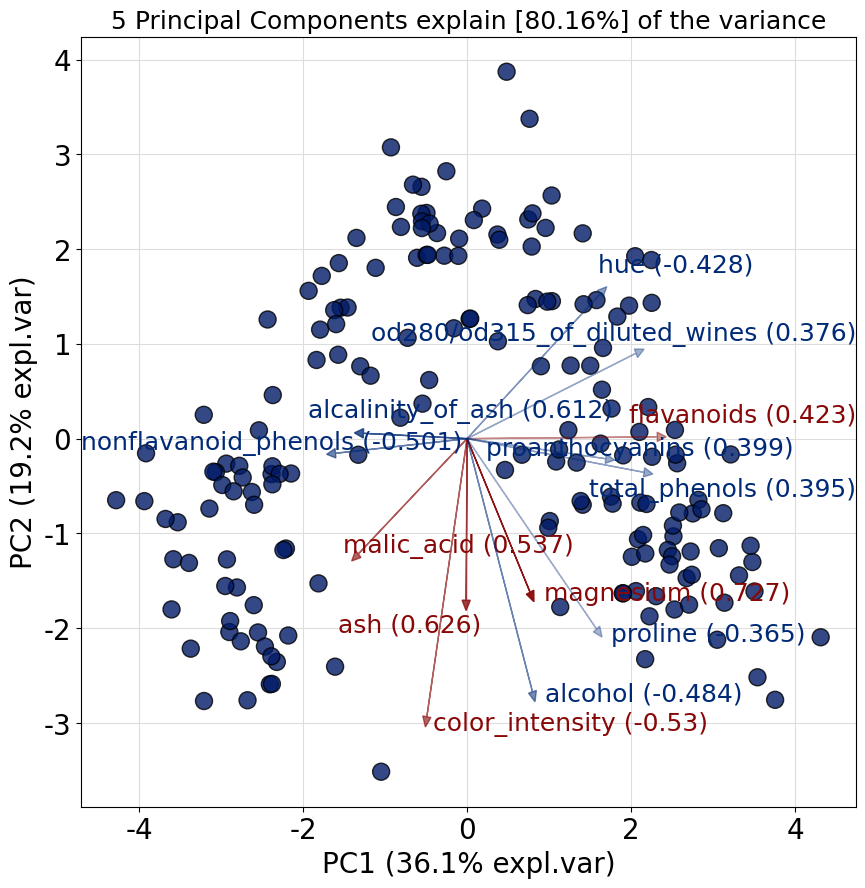

In [14]:
from pca import pca

model = pca(n_components=5)
model.fit_transform(scaled_X)
fig, ax = model.biplot(n_feat=scaled_X.shape[1], legend=False, figsize=(10, 10))
plt.show()
plt.close()

### 요인분석
- 변수들 간의 상관관계를 분석하여 공통 차원들을 통해 축약하는 통계기법
- 잠재변수에 대해 연결된 분산을 찾고 오차를 추가한 인자들의 선형 결합으로 관측된 변수 표현
- 잠재변수들은 기본적으로 대등한 관계
- 탐색 요인 분석 : 변수가 어느 요인에 부합될지에 대한 가설이 없을 때
- 확인 요인 분석 : 변수와 요인에 대한 특정한 가설을 토대로 요인 분석모델과 자료가 부합하는지 확인
- 변수 축소, 불필요한 변수 제거, 변수 특성 파악, 요인점수를 이용한 변수 생성

feature 13개, data 178개
잠재요인 요약: 
           alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
latent1  0.299731   -0.424489  0.143386          -0.387691   0.275096
latent2 -0.423886   -0.283977 -0.866066          -0.364116  -0.409356
latent3 -0.576480   -0.039512  0.368996           0.537425  -0.228729
latent4 -0.117865   -0.148264 -0.013634          -0.073661   0.668697
latent5 -0.194167    0.157465 -0.071648           0.239827   0.209583 



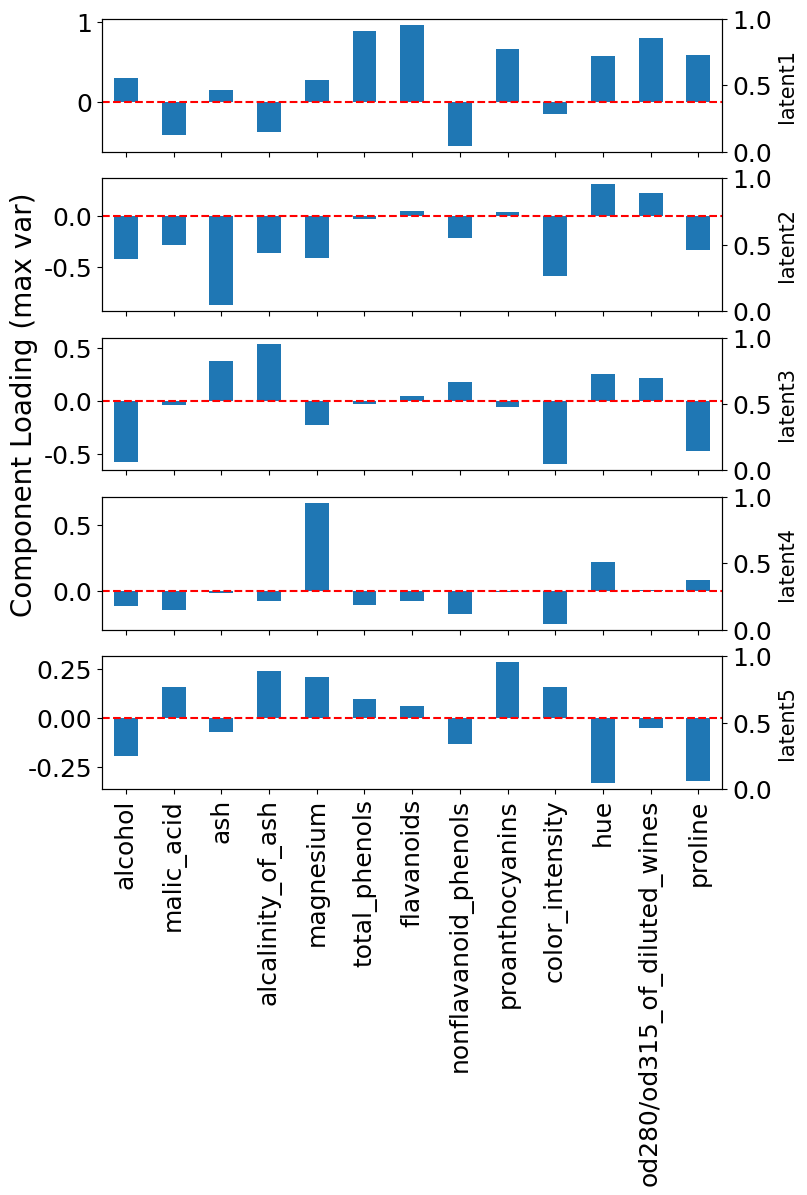

In [15]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

best_dim = 5

model = FactorAnalysis(n_components=best_dim)
model.fit(scaled_X)
FA_result = model.transform(scaled_X)

max_var = pd.DataFrame(model.components_, index=['latent%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print(f"잠재요인 요약: \n {max_var.iloc[:, :5]} \n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    max_var.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(max_var.columns))))
    ax.set_xticklabels([" " for i in range(len(max_var.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(max_var.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(max_var.columns))))
ax.set_xticklabels(list(max_var.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (max var)", fontsize=20)
plt.show()

### 독립성분 분석 (Independent component anlaysis)
- 다변량의 신호를 최대한 독립적인 추가 하부성분으로 분리하는 방법
- 잡음항이 포함되지 않아, 모델이 정확하려면 백색화 필요

feature 13개, data 178개
독립성분 요약: 
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
ind comp1 -0.024105   -0.005155 -0.007659           0.008957  -0.018438
ind comp2  0.009505   -0.029927 -0.021531          -0.032238  -0.000413
ind comp3 -0.006502    0.027985 -0.031585          -0.007412   0.004399
ind comp4  0.021521    0.015567 -0.000031          -0.006517  -0.063530
ind comp5  0.002840    0.006247 -0.025368          -0.018937  -0.011574 



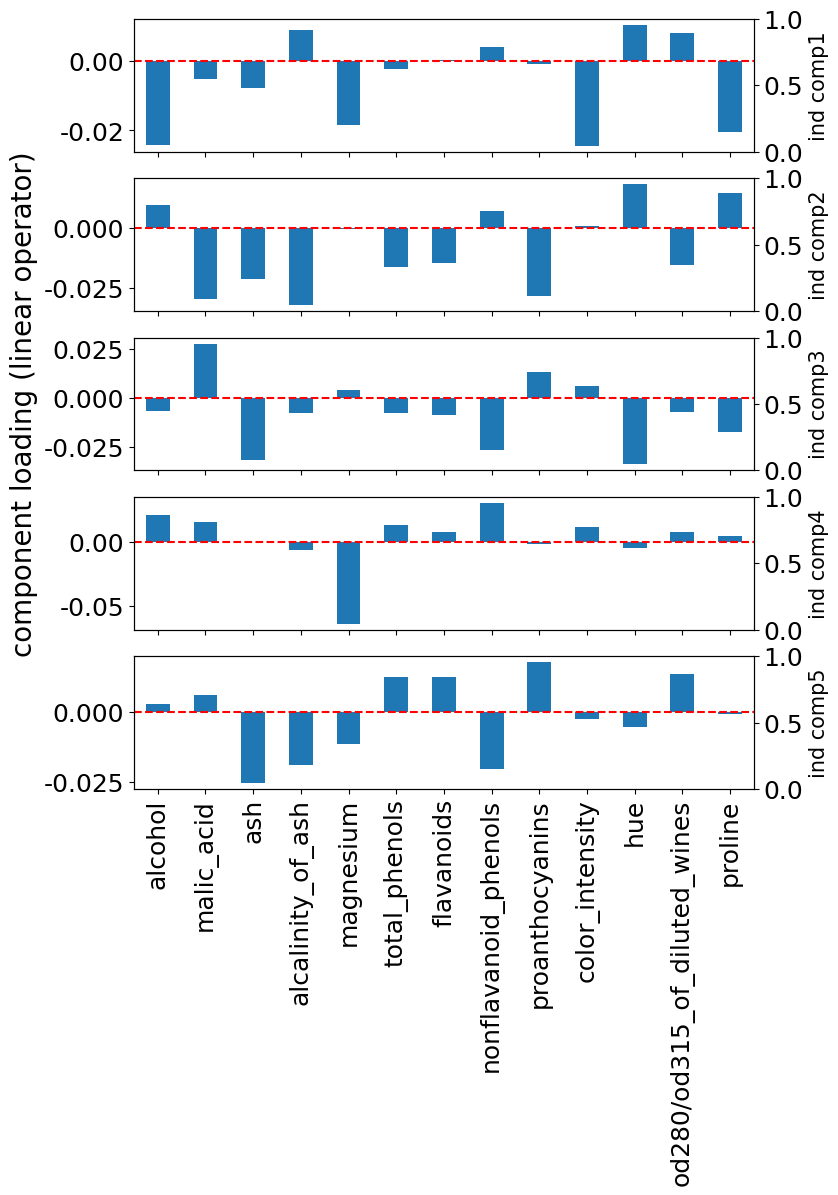

In [17]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

load = load_wine()
X = pd.DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

best_dim = 5
model = FastICA(n_components=best_dim, algorithm='parallel', whiten=True, fun='logcosh')
model.fit(scaled_X)
ICA_result = model.transform(scaled_X)

ind_comp = pd.DataFrame(model.components_, index=['ind comp%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print("독립성분 요약: \n", ind_comp.iloc[:, :5], "\n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    ind_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(ind_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(ind_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(ind_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(ind_comp.columns))))
ax.set_xticklabels(list(ind_comp.columns))
axes[round(best_dim/2)].set_ylabel("component loading (linear operator)", fontsize=20)
plt.show()

### 음수 미포함 행렬 분해(Non-negative matrix factorization)
- 데이터와 구성 요소가 음수가 아니라고 가정하에 진행하는 분해방법
    - 데이터 X를 음수를 포함하지 않는 두 개의 행렬 W,H로 분해하는데, X와 WH사이의 거리인 d를 최적화하면서 진행. 거리는 squared Frobenius norm으로 계산
- 벡터 표현은 구성요소를 빼지 않고 겹쳐서 덧셈 방식으로 얻는다.

feature 13개, data 178개
NMF 성분 요약: 
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
NMF comp1  0.533032    0.000000  0.231414           0.000000   0.276342
NMF comp2  0.251895    0.205227  0.103096           0.012536   0.000000
NMF comp3  0.557189    1.246465  0.504060           0.656570   0.123347
NMF comp4  0.000000    0.000000  1.081248           1.337276   0.945641
NMF comp5  0.075718    0.000000  0.341988           0.373311   0.000000 



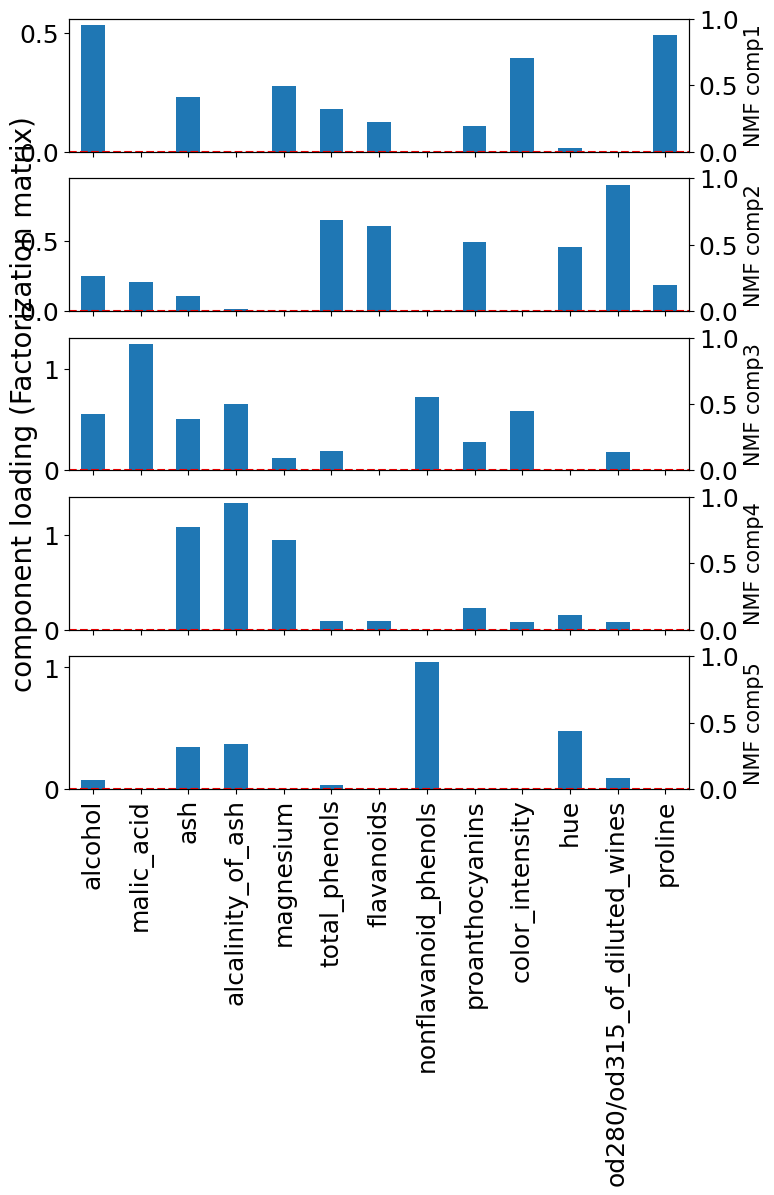

In [20]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

load = load_wine()
X = pd.DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

mm = MinMaxScaler()
scaled_X = pd.DataFrame(mm.fit_transform(X), columns=X.columns)

best_dim = 5
model = NMF(n_components=best_dim, init='random', max_iter=2000)
model.fit(scaled_X)
NMF_result = model.transform(scaled_X)

NMF_comp = pd.DataFrame(model.components_, index=['NMF comp%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print("NMF 성분 요약: \n", NMF_comp.iloc[:, :5], "\n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    NMF_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(NMF_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(NMF_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(NMF_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(NMF_comp.columns))))
ax.set_xticklabels(list(NMF_comp.columns))
axes[round(best_dim/2)].set_ylabel("component loading (Factorization matrix)", fontsize=20)
plt.show()

### 다차원척도법 (Multidimensional scaling)
- 원래 데이터의 고차원 공간에서의 거리를 잘 반영하는 저차원 데이터 탐색
- 관측 대상의 상대적 거리의 정확도를 높이기 위해 적합 정도를 stress값으로 나타내며, 반복 알고리즘을 통해 stress값을 최소로 하는 모형 탐색
    - stress는 작을수록 좋으며 0.1이하는 좋다고 봄
    - 실제 데이터 간 거리와 MDS로 추정된 거리 간의 차이 오차
- 계량적 MDS : 데이터가 구간척도나 비율척도인 경우, 개체들 간의 유클리드 거리 행렬을 계산하고 개체들 간의 비유사성을 공간상에 표현
- 비계략적 MDS : 데이터가 서열척도인 경우, 서열척도를 거리의 속성과 같도록 변환하여 거리를 생성한 후 적용

feature 13개, data 178개
차원 수 2 일 때, stress 0.2301572646914574
차원 수 3 일 때, stress 0.14421638408180104
차원 수 4 일 때, stress 0.10153475198496567
차원 수 5 일 때, stress 0.07167081747123694
차원 수 6 일 때, stress 0.05262312447954535


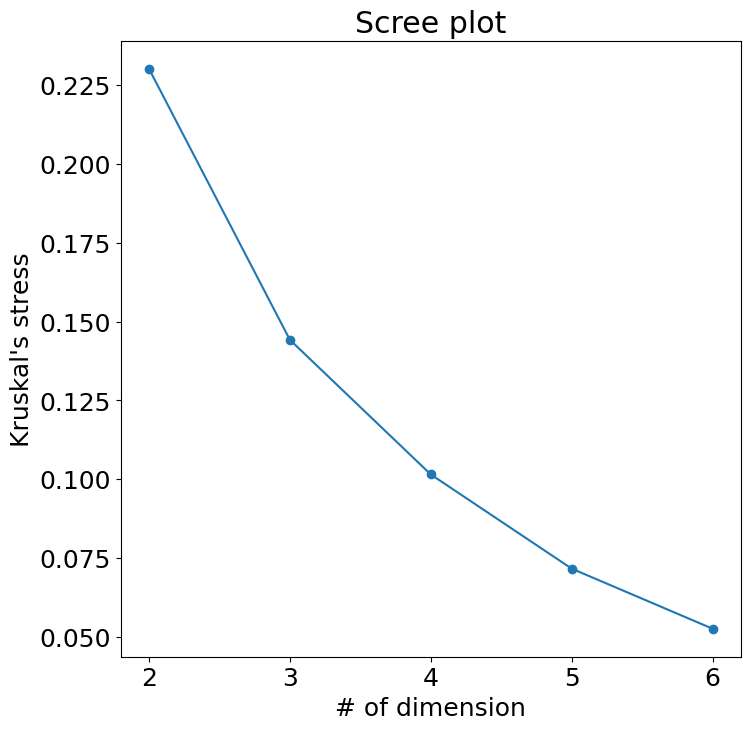

raw stress: 2122.211(~ 2121.620)
kruskal stress: 0.072(~ 0.072)


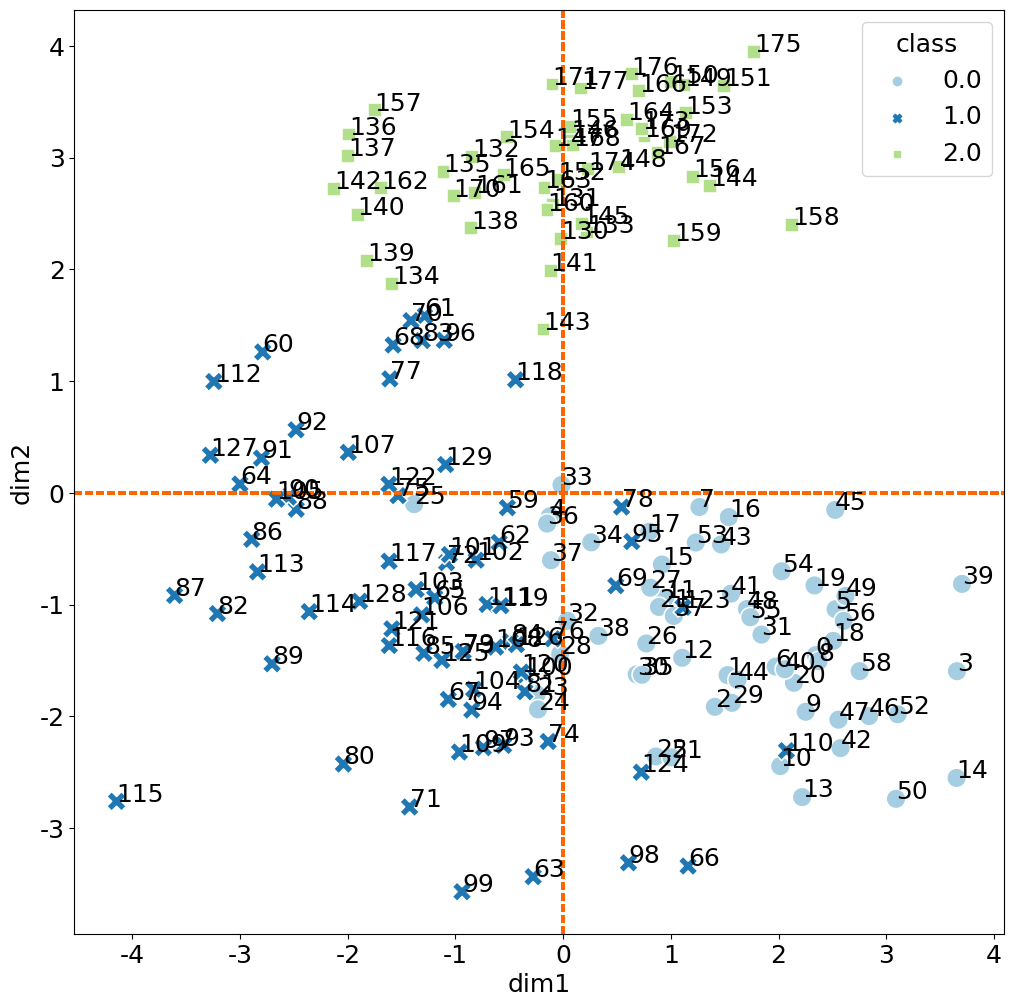

In [24]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

load = load_wine()
X = pd.DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

distances = pairwise_distances(scaled_X)

Slist = []
for i in range(2,7):
    mds = MDS(n_components=i, metric=True, random_state=0)
    mds.fit(scaled_X)
#     reduced_d = pairwise_distances(mds.embedding_) # 차원 축소된 데이터 간의 거리
#     distances = mds.dissimilarity_matrix_ # 데이터간 실제 거리
    sklearn_stress = mds.stress_ # 0.5*np.sum((distances-reduced_d)**2)
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(distances**2))) # stress-1
    Slist.append(kruskal_stress)
    print(f"차원 수 {i} 일 때, stress {kruskal_stress}")

# scree plotting
plt.rcParams['figure.figsize'] = (8,8)
plt.title("Scree plot")
plt.plot(list(range(2,7)), Slist, marker='o')
plt.xlabel("# of dimension")
plt.ylabel("Kruskal's stress")
plt.show()
    
best_dim = 5
model = MDS(n_components=best_dim, metric=True)
MDS_result = pd.DataFrame(model.fit_transform(scaled_X)) # model.embedding_과 동일
reduced_d = pairwise_distances(model.embedding_)

print(f"raw stress: {model.stress_:.3f}(~ {0.5*np.sum((distances-reduced_d)**2):.3f})")
print(f"kruskal stress: {np.sqrt(model.stress_ / (0.5*np.sum(distances**2))):.3f}(~ {np.sqrt(np.sum((distances-reduced_d)**2)/np.sum(distances**2)):.3f})")

reduced_data = pd.DataFrame(np.c_[MDS_result.values, y], columns=['dim1', 'dim2', 'dim3' ,'dim4', 'dim5', 'class'])
plt.rcParams['figure.figsize'] = (12, 12)
sns.scatterplot(x='dim1', y='dim2', data=reduced_data, style='class', style_order=[0,1,2], hue='class', palette='Paired', s=200)
for i, name in enumerate(MDS_result.index):
    plt.text(reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    plt.axhline(0, 0, ls='--', color='#ff6600')
    plt.axvline(0, 0, ls='--', color='#ff6600')
plt.show()

### 원본 데이터와 차원 축소 데이터로 적합한 모델 성능 비교

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_list = [scaled_X, PCA_result, FA_result, ICA_result, NMF_result, MDS_result]
title_list = ['original', 'PCA', 'FA', 'ICA', 'NMF' ,'MDS']
y = load['target']

for X, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    trainS, testS = lr.score(X_train, y_train), lr.score(X_test, y_test)
    print(f"{title} data:")
    print(f"train score: {trainS}, test score: {testS}")

original data:
train score: 0.8903525326034907, test score: 0.9150699435498094
PCA data:
train score: 0.8270083369235681, test score: 0.8278646768734172
FA data:
train score: 0.8765409167951272, test score: 0.8804517023778357
ICA data:
train score: 0.827008336923568, test score: 0.8278646768734172
NMF data:
train score: 0.827361560220664, test score: 0.8449501307335814
MDS data:
train score: 0.8056392588779324, test score: 0.7917778047221573


## 10-2 군집분석
- 레이블 없는 데이터를 분류하는 경우, 모델을 훈련시킬 수 있는 응답변수가 없으므로 군집분석을 통해 공통적인 패턴 식별 및 분류
- 거리 기반으로 모델링 하므로 데이터 표준화 필요
- 이상치에 민감하므로 전처리 필요
- 모든 설명변수를 고려하므로 중요하지 않은 변수가 추가될 수록 정확도 감소

### 10-2-1 계층적 군집분석
- 계층적 클러스터링을 통해 서로 다른 수의 클러스터를 지정하는 과정 시각화
- 해석이 수월하나 대규모 데이터에 적용어려움

In [31]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

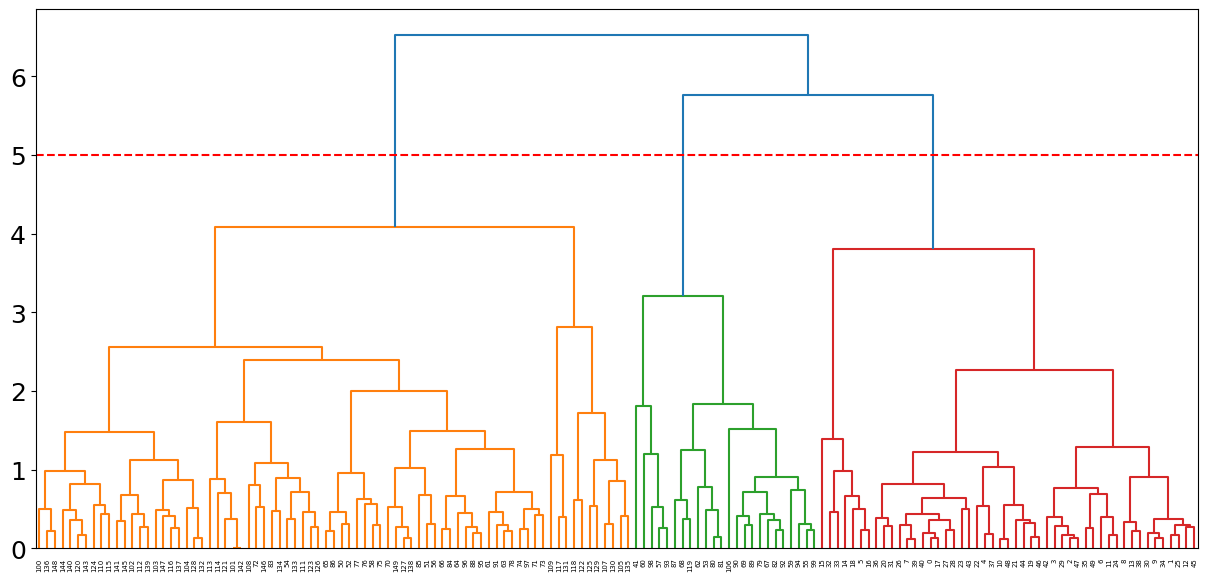

In [35]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler

X = load_iris()['data']
y = load_iris()['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load_iris()['feature_names']))

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

Z = linkage(df, method='complete') # single, complete, average, weighted, centroid, median, ward

distance_setting = 5
fig, ax = plt.subplots(figsize=(15,7))
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting)

plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score, completeness_score

n_cluster = 3
Hclustering_result = cut_tree(Z, n_cluster).flatten()

print(f"silhouette score :{silhouette_score(df, Hclustering_result):.3f}")
print(f"completeness score : {completeness_score(y, Hclustering_result):.3f}")

silhouette score :0.450
completeness score : 0.685


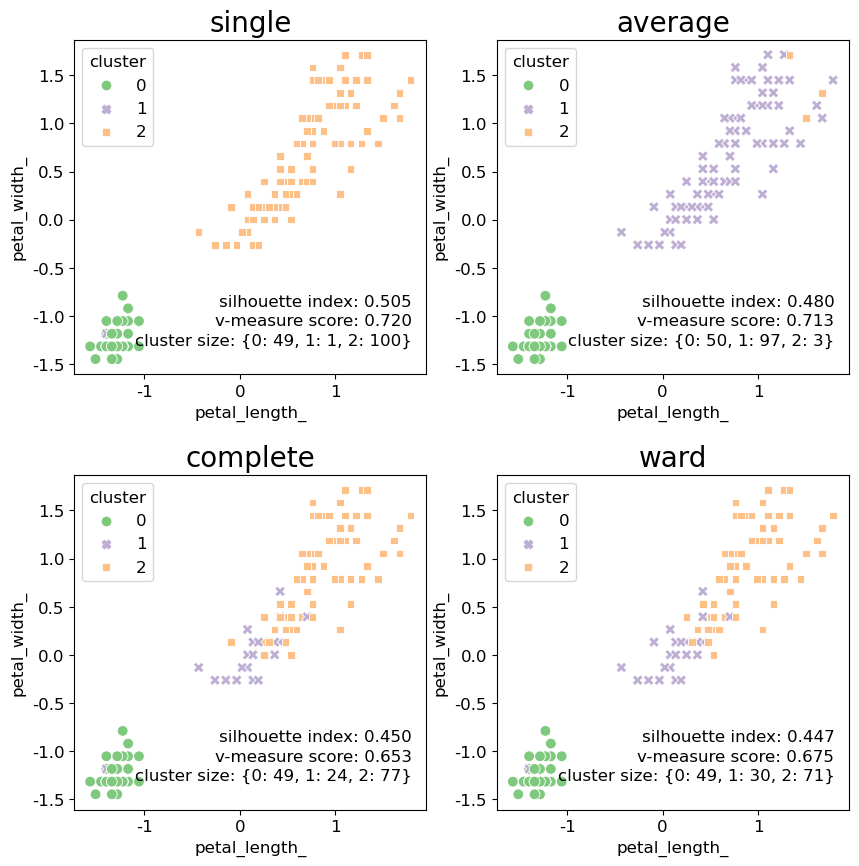

In [42]:
# 비유사도 측정 지표 별 군집 결과 비교

from collections import Counter
from sklearn.metrics import silhouette_score, v_measure_score

fig, axes = plt.subplots(2,2, figsize=(10,10))
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(hspace=0.3)

method = ['single', 'average', 'complete', 'ward']
for ax, method in zip(axes.ravel(), method):
    Z = linkage(df, method=method)
    cluster = pd.DataFrame({'cluster':cut_tree(Z, 3).flatten()})
    ddf = pd.merge(df, cluster, left_index=True, right_index=True)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster', style='cluster', s=60, ax=ax, palette='Accent')
    ax.text(1.8, -0.9, f"silhouette index: {silhouette_score(df, ddf['cluster']):.3f}", horizontalalignment='right')
    ax.text(1.8, -1.1, f"v-measure score: {v_measure_score(load_iris()['target'], ddf['cluster']):.3f}", horizontalalignment='right')
    cluster_size = dict(Counter(ddf['cluster']))
    ax.text(1.8, -1.3, f"cluster size: {cluster_size}", horizontalalignment='right')
    ax.set_title(method, fontsize=20)
plt.show()

### 10-2-2 비계층적 군집분석
### K-means clustering
- 사용자가 미리 정한 k값과 클러스터 평균의 초기값을 가짐 -> 각 데이터를 거리가 가장 가까운 평균을 갖는 클러스터에 할당 -> 새로 할당된 데이터들고 새로운 클러스터 평균 계산 -> 각 데이터에 대한 클러스터 할당이 더 변하지 않으면 클러스터링 종료
- 이러한 반복 시 클러스터 내 데이터와 클러스터 평균 오차제곱합이 최소가 되도록
- 군집 개수에 따른 오차제곱합 시각화하여, 오차제곱합이 평평해지기 시작하는 지점이 최적 k
- 이해하기 쉽고 빠르며, 대용량 데이터셋에서도 잘 작동
- 초기값에 따라 다른 결과, 평균은 이상치에 민감하므로 중앙값 사용하면, 계산 비용은 더 높지만 노이즈를 효율적으로 제거

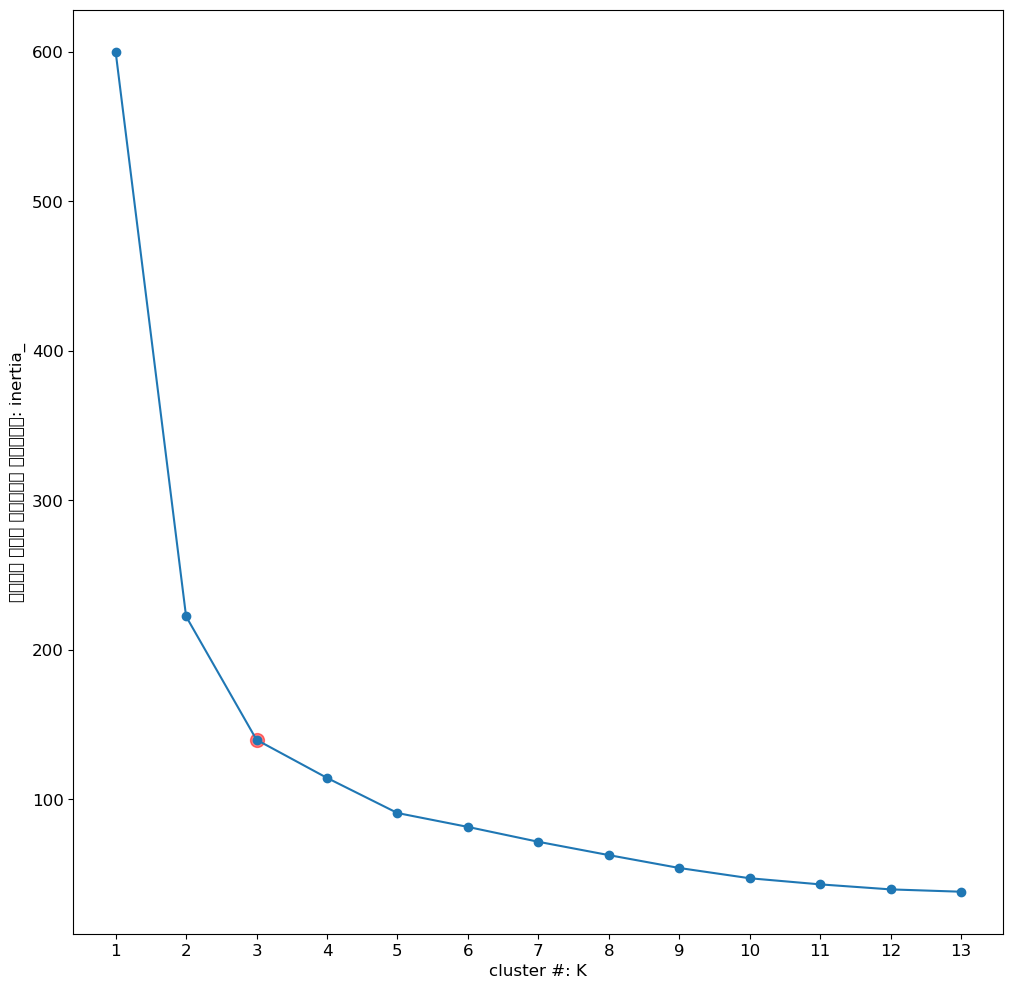

In [44]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

# 적정 군집 개수 정하기
I = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_)
plt.plot(list(range(1,14)), I, marker='o')
    
n_cluster = 3
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1, 14)), list(range(1,14)))
plt.xlabel("cluster #: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합: inertia_")
plt.show()

model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df)
kmeans_result = model.labels_

클러스터 구성:  Counter({0: 53, 1: 50, 2: 47})
클러스터 중심: 
           sepal_length_  sepal_width_  petal_length_  petal_width_
cluster0      -0.050220     -0.883376       0.347738      0.281527
cluster1      -1.014579      0.853263      -1.304987     -1.254893
cluster2       1.135970      0.088422       0.996155      1.017526
실루엣 계수: 0.460
completeness score: 0.660


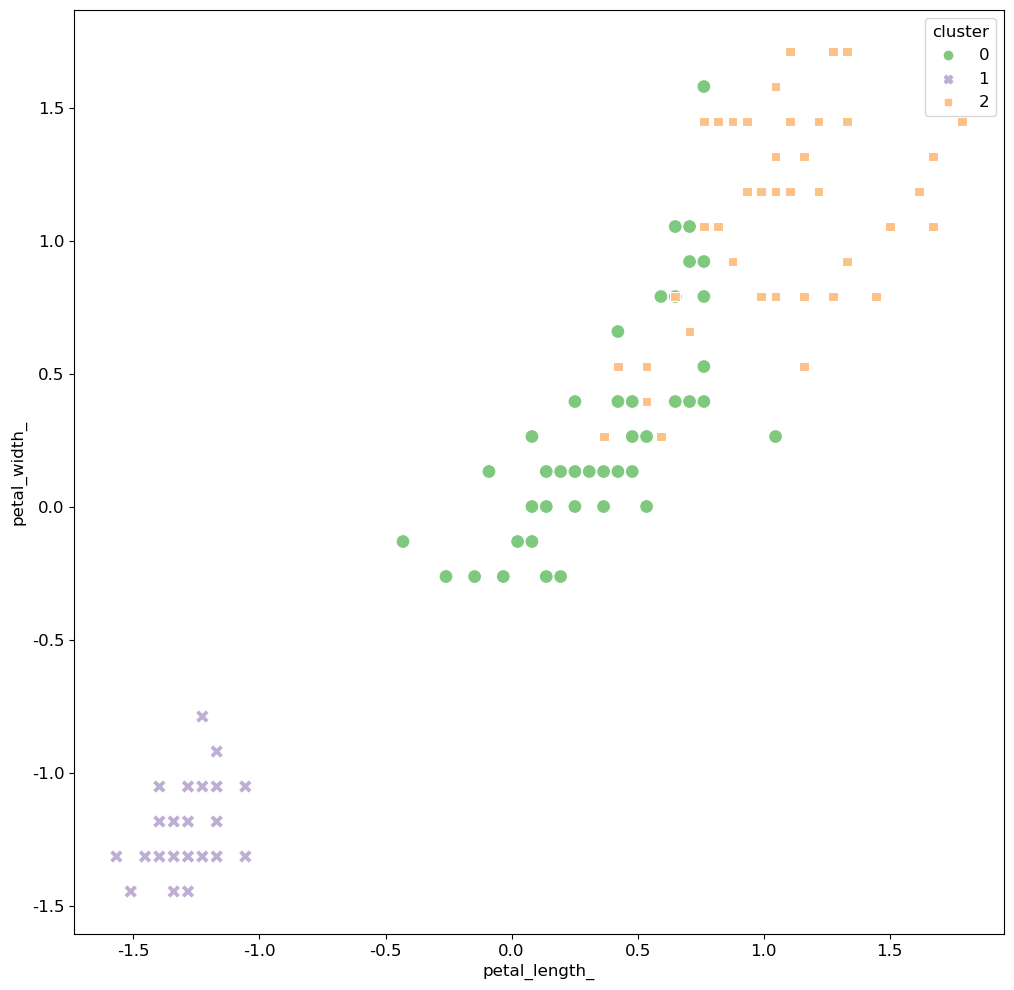

In [45]:
from sklearn.metrics import silhouette_score, completeness_score

model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df)
kmeans_result = model.labels_

print("클러스터 구성: ", Counter(model.labels_))
centers = pd.DataFrame(model.cluster_centers_, columns=df.columns, index=["cluster%s" %i for i in range(n_cluster)])
print("클러스터 중심: \n", centers)

print(f"실루엣 계수: {silhouette_score(df, kmeans_result):.3f}")
print(f"completeness score: {completeness_score(y, kmeans_result):.3f}")

df['cluster'] = kmeans_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

### DBSCAN(Density-based spatial clustering of applications with noise)
- 데이터의 밀집지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분
- eps로 지정한 거리안의 데이터 들이 min_smaples 개수 이상 되면 이 데이터들을 핵심 샘플로 분류하며, 하나의 클러스터를 이루게 됨
- 비선형과 같은 복잡한 형상을 찾을 수 있으며 어떤 클래스에도 속하지 않는 노이즈 데이터 구분 가능
- 밀도가 높은 곳에 집중하므로, 밀도가 낮은 곳의 데이터를 노이즈로 구분할 수 있음, 다소 느리며 데이터 수가 많아질 수록 모델링 시간 증가

Proper eps:


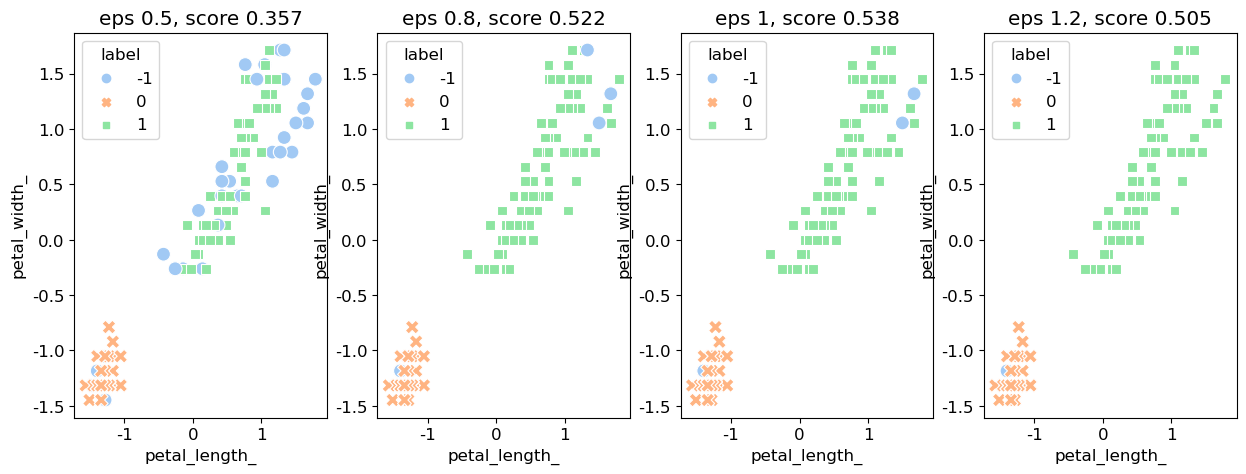

In [51]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x : x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

print("Proper eps:")
eps_list = [0.5, 0.8, 1, 1.2]
fig, axes = plt.subplots(1, 4, figsize=(15,5))
plt.rcParams['font.size'] = 12
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=5).fit(df)
    temp_df = df.copy()
    temp_df['label'] = db.labels_
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=100, ax=ax, palette='pastel')
    score = silhouette_score(df, db.labels_)
    ax.set_title(f"eps {eps}, score {score:.3f}")
plt.show()

클러스터 구성:  Counter({1: 97, 0: 49, -1: 4})
핵심 데이터 인덱스:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  86  88  89  90  91  92  94  95  96  97  98
  99 100 101 102 103 104 107 110 111 112 113 114 115 116 120 121 123 124
 125 126 127 128 129 130 132 133 134 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
실루엣 계수: 0.539
completeness score: 0.837


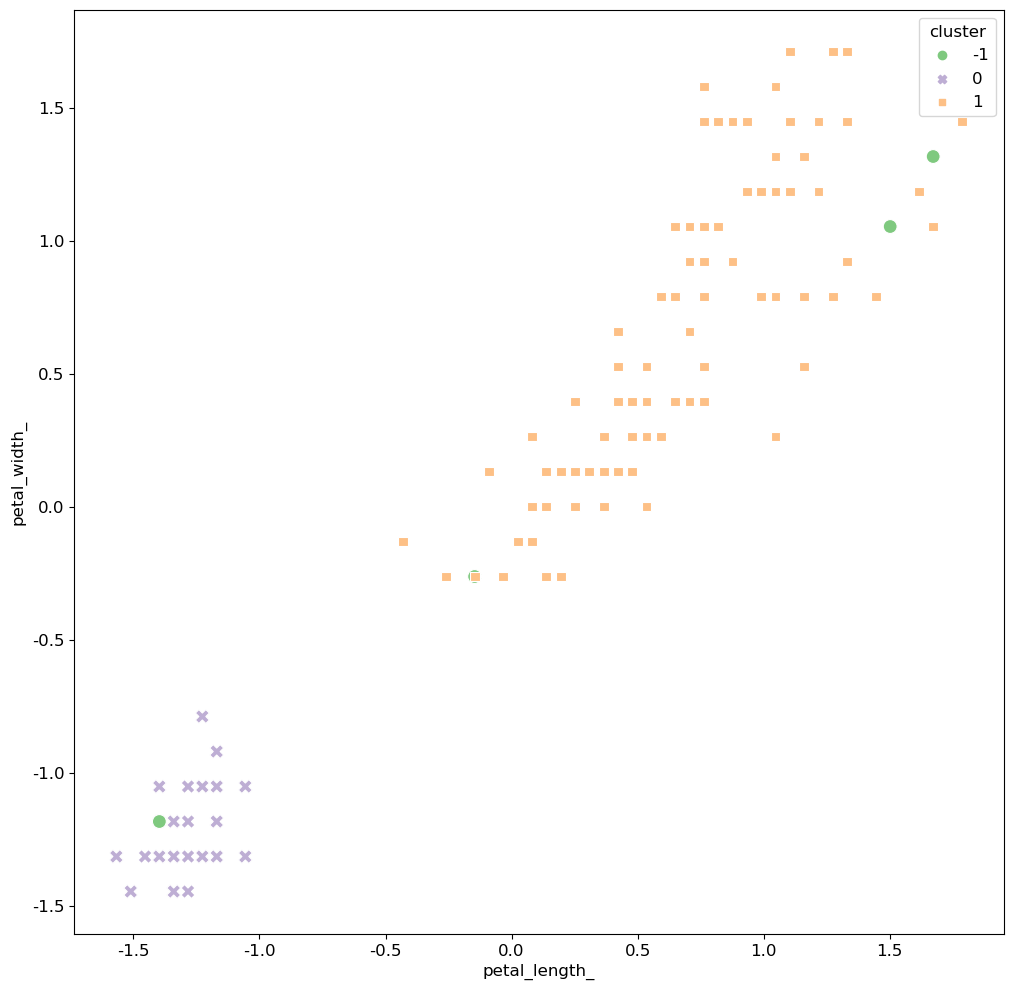

In [52]:
from sklearn.metrics import silhouette_score, completeness_score

eps = 1
model = DBSCAN(eps=eps, min_samples=10).fit(df)
DB_result = model.labels_

print("클러스터 구성: ", Counter(model.labels_))
print("핵심 데이터 인덱스: ", model.core_sample_indices_)

print(f"실루엣 계수: {silhouette_score(df, DB_result):.3f}")
print(f"completeness score: {completeness_score(y, DB_result):.3f}")

df['cluster'] = DB_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

### 혼합분포군집
- 계층적 클러스터링 : 경험 기반 
- 모델기반 & 분포기반 : 통계이론 기초, 데이터를 가장 잘 설명하는 다변량 정규분포 찾기
    - 클러스터들이 각자 서로 다른 확률분포로부터 발생한 것으로 가정하며, 모든 ㄷ이터가 서로 가까울 필요는 없다

[기댓값 최대화 알고리즘(EM)]
- 최대우도 : 모델이 주어졌을 때 데이터의 조건부 확률. 모델을 변형시키며 이 조건부확률이 최대화 되는 모델 찾음
    - 보통 우도에 로그값을 취한 로그우도 최대화하는 방법 사용
[군집 갯수 k]
- 여러개의 분포 개수들로 각각 클러스터링 하여 BIC값이 가장 적고, 시각화 빛 군집 타당성이 가장 유효한 모델

[장단점] 
- 군집을 몇 개의 모수로 표현할 수 있고, 서로 다른 크기나 모양의 군집을 찾을 수 있다.
- 데이터들이 특정 분포를 따른다는 가정이 필요하며, 필요한 계산량이 높음. 알고리즘이 복잡하여 이상값에 민감


Proper num of dist


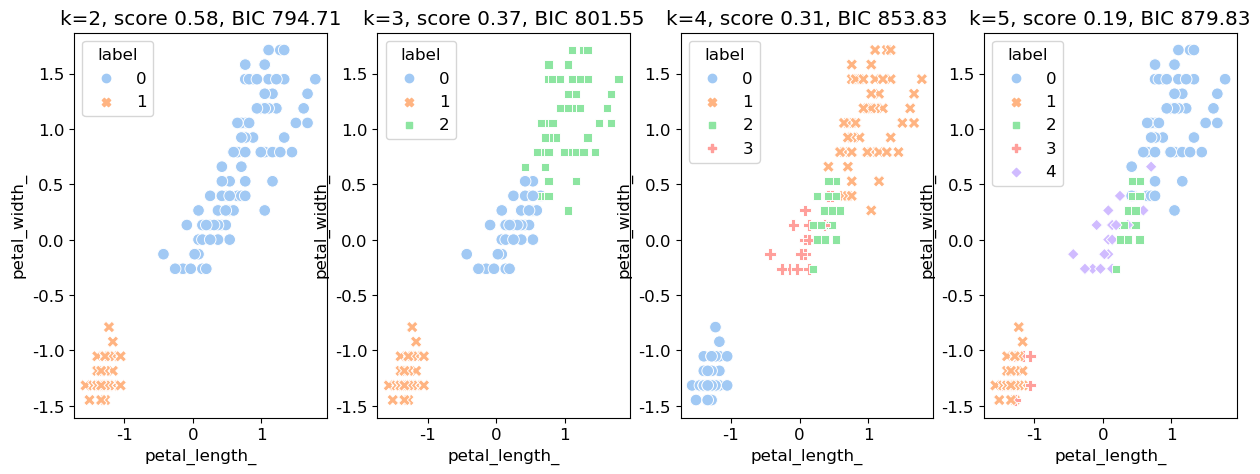

In [55]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x : x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

print("Proper num of dist")
dist_list = [2,3,4,5]
fig, axes = plt.subplots(1,4, figsize=(15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
    # covariance_type = {'full', 'tied', 'diag', 'spherical'}
    temp_df = df.copy()
    temp_df['label'] = gm.predict(df)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic, bic = gm.aic(df), gm.bic(df)
    score = silhouette_score(df, temp_df['label'])
    ax.set_title(f"k={k}, score {score:.2f}, BIC {bic:.2f}")

cluster structure:  Counter({0: 55, 1: 50, 2: 45})
dist feature avg : 
 [ 0.85192968 -0.24827046  0.98086333  1.03725094]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
dist weights:  [0.36534779 0.33333333 0.30131887]
model log-likelihood: -1.937
silhouette score: 0.374
completeness score: 0.901


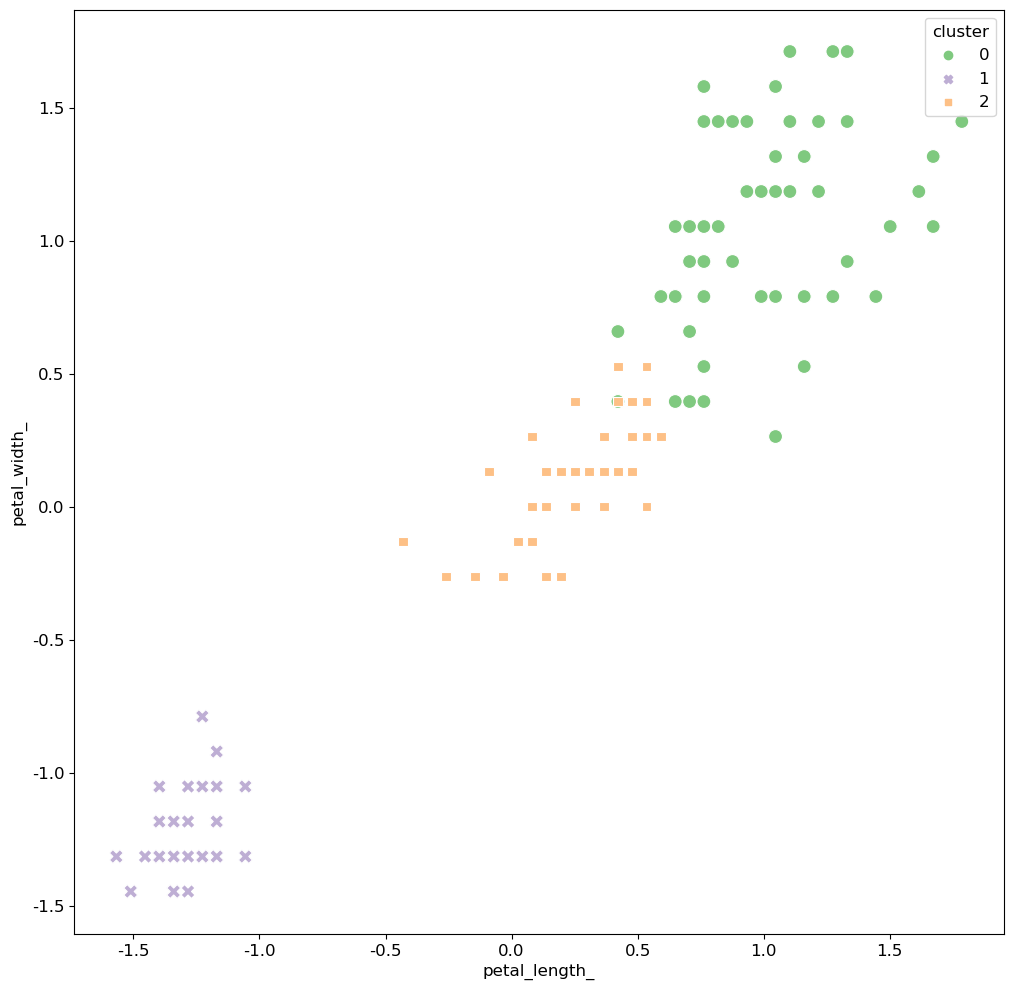

In [60]:
from sklearn.metrics import silhouette_score, completeness_score

k = 3
model = GaussianMixture(n_components=k).fit(df)
labels = model.predict(df)
GM_result = labels

print("cluster structure: ", Counter(labels))
print(f"dist feature avg : \n {model.means_[0]}\n {model.means_[1]}")
print("dist weights: ", model.weights_)
print(f"model log-likelihood: {model.score(df):.3f}")

print(f"silhouette score: {silhouette_score(df, labels):.3f}")
print(f"completeness score: {completeness_score(y, labels):.3f}")

df['cluster'] = GM_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue="cluster", style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

### SOM
- 경쟁학습 알고리즘, 상대적 순환보존 or 위상보존 : 입력값의 상대적인 순서가 뉴런에서도 보존
    - 가까이 놓인 뉴런들이 비슷한 입력값 표현
- 군집 개수 : SOM의 네트워크의 크기
- 장단점
    - 입력데이터들 사이의 위성을 잘 나타내고, 구별되지 않는 상관관계 잘 찾을 수 있음
    - 어떤 거리지표에 따라서 결과가 달라질 수 있으며, 대용량 세트는 분석이 어려움

proper size of network


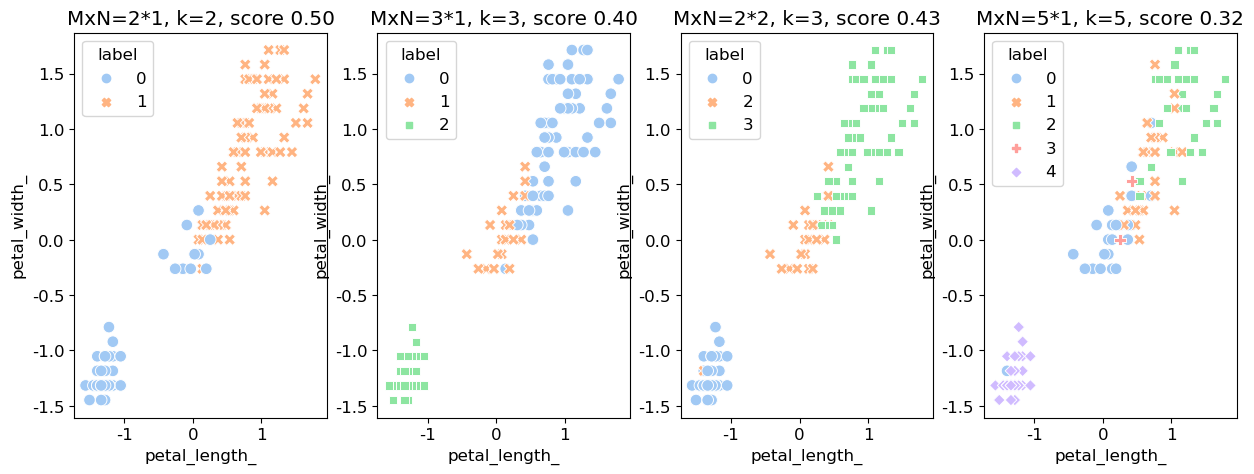

In [64]:
from sklearn.datasets import load_iris
from sklearn_som.som import SOM
from sklearn.preprocessing import StandardScaler

load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)","").replace(" ","_"), load['feature_names']))

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(X), columns=columns)

print("proper size of network")
mn_list = [(2,1), (3,1), (2,2), (5,1)]
fig, axes = plt.subplots(1,4, figsize=(15,5))
for ax, (M, N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1]) #dim : # of input data features
    som.fit(df.values)
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label'] = som.predict(df.values)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    score = silhouette_score(df, temp_df['label'])
    ax.set_title(f"MxN={M}*{N}, k={clusterNo}, score {score:.2f}")
plt.show()

cluster structure:  Counter({2: 67, 0: 50, 1: 33})
SOM map: 
 [[0.71989617 2.46027697 3.58007708]
 [0.93682664 2.20300905 3.45455422]
 [0.8511987  2.43630674 3.67790625]
 [0.97442354 2.39269504 3.65251221]
 [0.9066016  2.62998422 3.72780594]]
silhouette score: 0.407
completeness score: 0.764


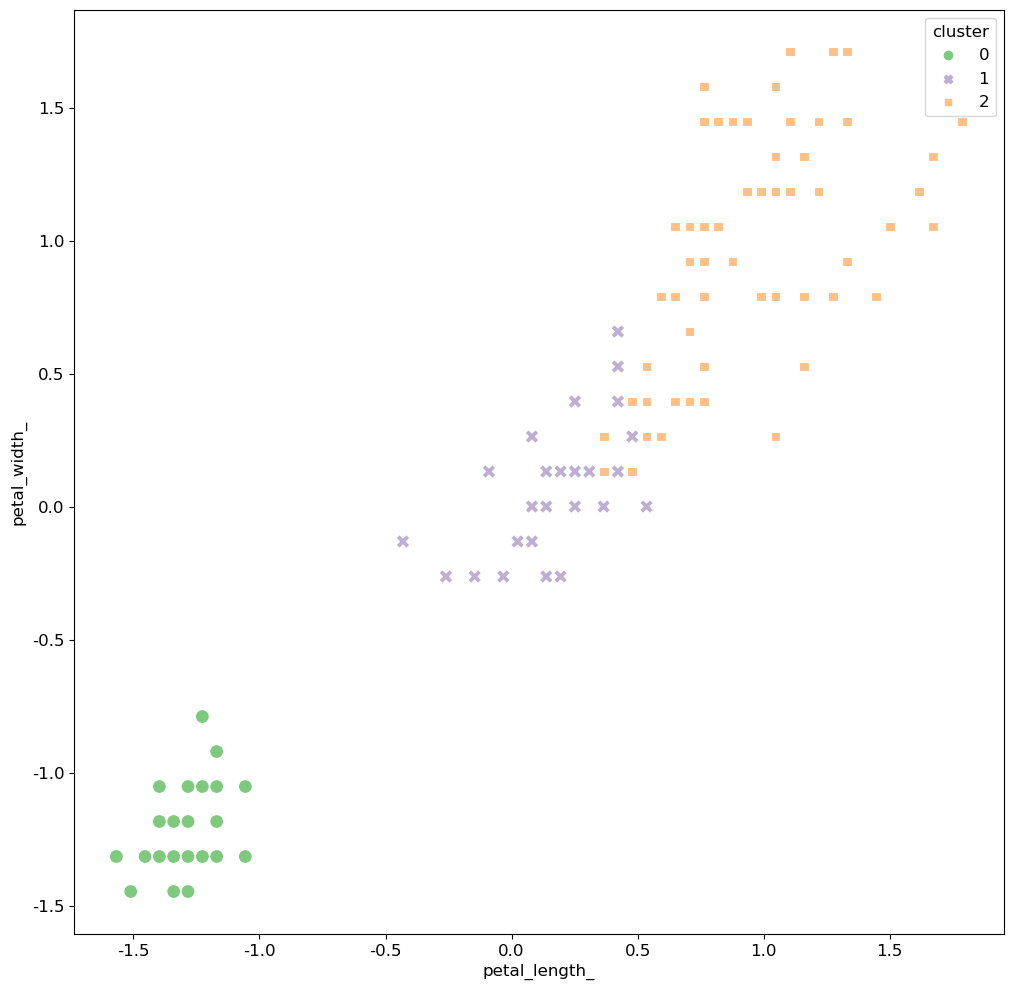

In [65]:
from sklearn.metrics import silhouette_score, completeness_score

M, N = (3, 1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
som_result = labels

SOMmap = model.transform(df.values)
print("cluster structure: ", Counter(labels))
print(f"SOM map: \n", SOMmap[:5])

print(f"silhouette score: {silhouette_score(df, labels):.3f}")
print(f"completeness score: {completeness_score(y, labels):.3f}")

df['cluster'] = som_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue="cluster", style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

## 10-3 연관규칙 학습
- 큰 데이터베이스에서 변수들 간의 흥미로운 관계를 발견하기 위한 규칙기반 기계학습
- 서열 분석 : 연관규칙학습에 시간이라는 개념을 포함시켜 순차적으로 구매 가능성이 큰 상품군 찾기

[연관규칙학습 측도]
- A : 조건절,  C : 결과절
- 지지도(support) : (A와 C가 동시에 포함된 거래 수 / 전체 거래 수) $$ support(A\rightarrow C)=P(A\cup C) $$
- 신뢰도(confidence) : (A와 C가 동시에 포함된 거래 수/ A가 포함된 거래 수) $$ confidence(A\rightarrow C) = P(C|A) $$
- 향상도(lift) : (A가 C가 동시에 포함된 거래 수 * 전체 거래 수) / (A가 포함된 거래 수 * C가 포함된 거래 수)
    - A가 구매되지 않앗을 떄 C의 구매확률에 비해 A가 구매됐을 때 C의 구매확률의 증가비
    - A, C의 구매가 서로 관련이 없는 경우 향상도가 1 이하
$$ lift(A\rightarrow C) = P(C|A)/P(C)$$
- 레버지리 (leverage) : A, C가 함꼐 나타나는 관찰 빈도와 A,C가 독립적인 경우 예상되는 빈도간의 차이. 0일 수록 관련이 없다
$$leverage(A\rightarrow C) = support(A\rightarrow C) - support(A) \times support(C)$$
- 확신(Conviction) : 높으면 consequent가 antecedent에 크게 의존
    - 1이면 독립, 1보다 크면 A가 C의 발생여부를 예측하는 데 유용한 품목
    $$conviction(A\rightarrow C) = (1-support(c))/(1-confidence(A\rightarrow C)) $$

[연관규칙학습 알고리즘]
- 빈발항목집합 : 최소지지도 보다 큰 지지도를 갖는 품목의 집합
    - Apriori : 모든 품목집합에 대한 지지도를 전부 계산하는 것이 아니라 최소 지지도 이상의 빈발항목 집합을 찾은 후 그것들에 대해서만 연관규칙 계산. 쉬우나 지지도가 낮은 후보집합 생성시 아이템 계산수가 많아지면 계산 복잡도 증가
    - FP-Growth : 후보 빈발항목 집합을 생성하지 않고 FP-Tree를 만든 후 분할정복방식 이용
- 장단점
    - 내용이 쉽게 이해가능하며, 분석 방향이나 목적이 특별히 없는 경우 목적변수가 없으므로 유용하게 활용. 데이터를 변환없이 그 자체로 이용할 수 있는 간단한 자료구조
    - 품목 수가 증가하면 분석에 필요한 계산은 기하급수적으로 늘어나며, 너무 세분화하면 의미가 없을 수 있어, 유사한 품목을 범주로 일반화가 필요
    - 거래량이 적은 품목은 거래수가 적어서 규칙 발견 시 제외되기 쉽다 : 중요한 품목이라면 유사한 품목과 범주로 구성하여 규칙 과정에 포함 가능

In [74]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans','Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_).applymap(lambda x: 1 if x else 0)

# APRIORI
print("APRIORI")
fset = apriori(df, min_support=0.6, use_colnames=True, verbose=0)
print("빈발항목 집합: \n", fset.sort_values(by='support', ascending=False))
# metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
# min_threshold = metric 파라미터값의 최소값 설정
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, liftrk 1.2이상인 rule
print("연관규칙")
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

# FP Growth
print("\nFP Growth")
fset = fpgrowth(df, min_support=0.6, use_colnames=True, verbose=0)
print("빈발항목 집합: \n", fset.sort_values(by='support', ascending=False))

# metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
# min_threshold = metric 파라미터값의 최소값 설정
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, liftrk 1.2이상인 rule
print("연관규칙")
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

'''
- lift 1.25인 규칙들의 경우, Eggs를 사는 사람은 (Kidney Beans, Onion)를 살 확률이 다소 높은 의미

- leverage 0.12인 규칙들의 경우, 0에 가까우므로 연관이 커보이지 않음

- conviction 값들은 1 이상이므로 어느 정도 C 항목 발생여부 예측에 유용하다고 볼 수 있다
'''

APRIORI
빈발항목 집합: 
     support                     itemsets
1       1.0               (Kidney Beans)
0       0.8                       (Eggs)
5       0.8         (Eggs, Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Eggs, Onion, Kidney Beans)
연관규칙
             antecedents consequents  antecedent support  consequent support  \
2                 (Eggs)     (Onion)                 0.8                 0.6   
3                (Onion)      (Eggs)                 0.6                 0.8   
8   (Eggs, Kidney Beans)     (Onion)                 0.8                 0.6   
9  (Onion, Kidney Beans)      (Eggs)                 0.6                 0.8   

   support  confidence  lift  leverage  conviction  zhangs_metric  len_ant  \
2    

/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


'\n- lift 1.25인 규칙들의 경우, Eggs를 사는 사람은 (Kidney Beans, Onion)를 살 확률이 다소 높은 의미\n\n- leverage 0.12인 규칙들의 경우, 0에 가까우므로 연관이 커보이지 않음\n\n- conviction 값들은 1 이상이므로 어느 정도 C 항목 발생여부 예측에 유용하다고 볼 수 있다\n'

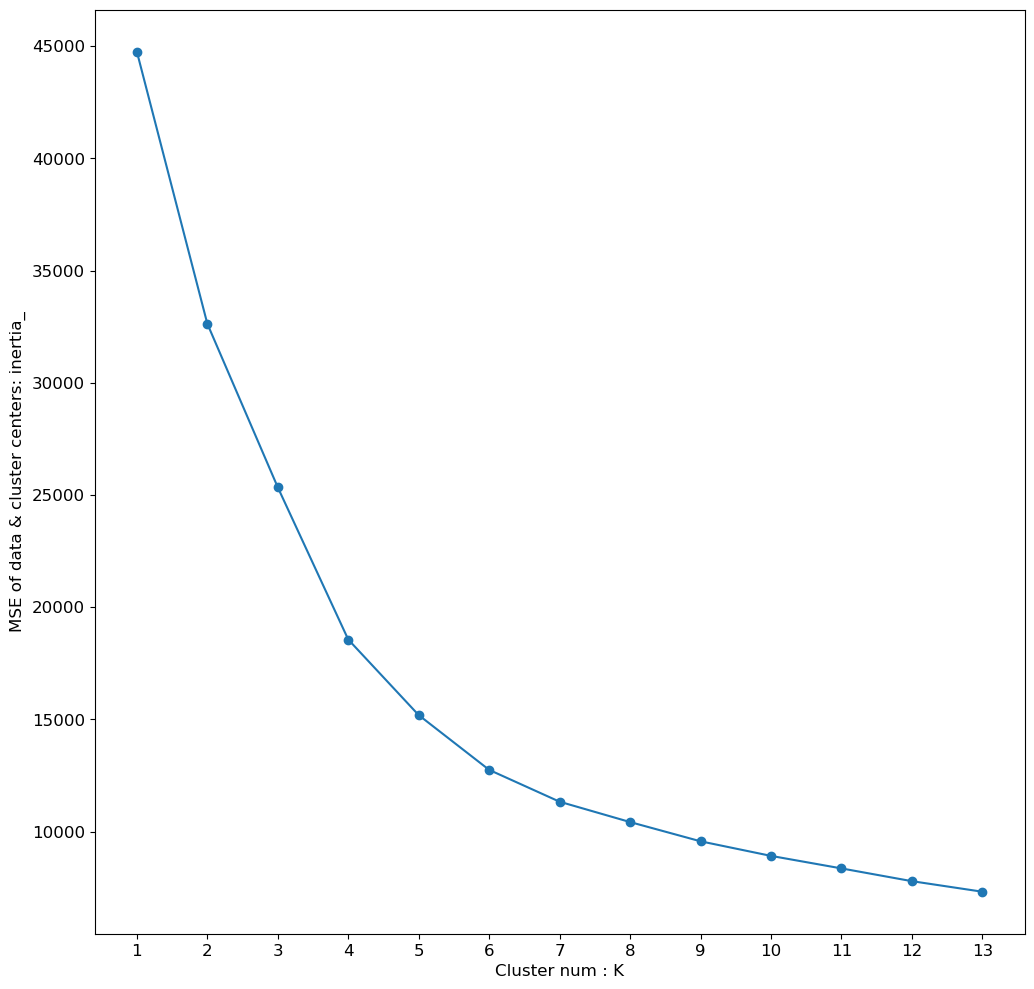

Counter({2: 3604, 0: 3478, 1: 1485, 3: 383})
silhouette score:  0.422


In [80]:
# prac 1
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score

df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv")
df2 = df.drop("CUST_ID", axis=1) # 범주형 변수로서 고객 식별일 뿐

ss = StandardScaler()
scaled = pd.DataFrame(ss.fit_transform(df2), columns=df2.columns)

# KMeans
I = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k).fit(scaled)
    I.append(kmeans.inertia_)
plt.plot(list(range(1,14)), I, marker='o')
plt.xticks(list(range(1,14)), list(range(1, 14)))
plt.xlabel("Cluster num : K")
plt.ylabel("MSE of data & cluster centers: inertia_")
plt.show()

# n_cluster = 4
Kmodel = KMeans(n_clusters=4, random_state=0)
Kmodel.fit(scaled)
kmeans_result = Kmodel.labels_
print(Counter(kmeans_result))
print("silhouette score: ", round(silhouette_score(scaled, kmeans_result),3))

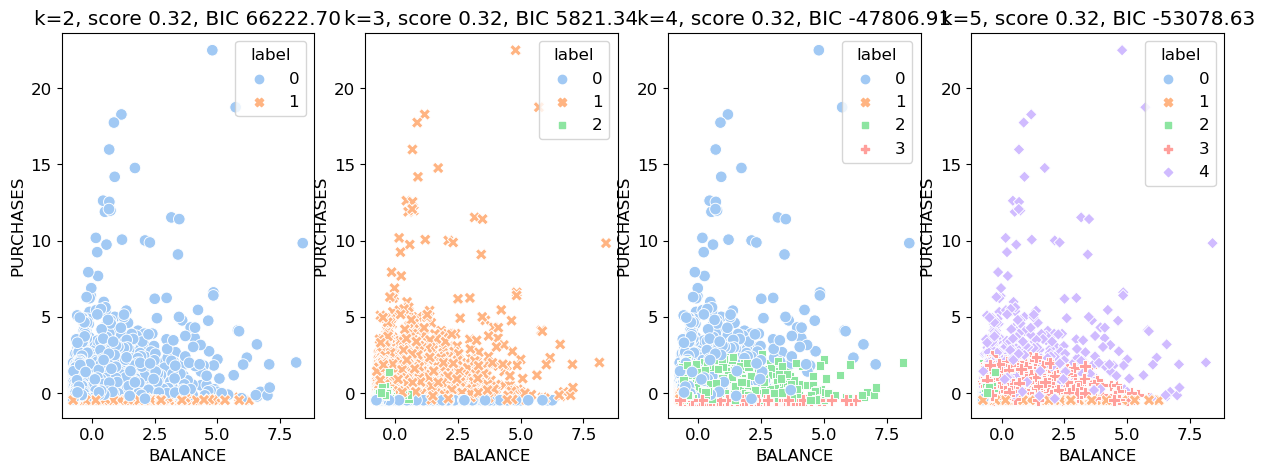

Counter({0: 4496, 1: 2040, 2: 1426, 3: 988})
silhouette score:  0.175


In [84]:
# 혼합분포군집
dist_list = [2,3,4,5]
fig, axes = plt.subplots(1,4,figsize=(15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(scaled)
    temp_df = scaled.copy()
    temp_df['label'] = gm.predict(scaled)
    sns.scatterplot(x='BALANCE', y='PURCHASES', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic, bic = gm.aic(scaled), gm.bic(scaled)
    ax.set_title(f"k={k}, score {score:.2f}, BIC {bic:.2f}")

plt.show()

# n_cluster = 4
Gmodel = GaussianMixture(n_components=4)
Gmodel.fit(scaled)
GM_result = Gmodel.predict(scaled)
print(Counter(GM_result))
print("silhouette score: ", round(silhouette_score(scaled, GM_result),3))

In [86]:
# prac 3
df['cluster'] = kmeans_result
print(df.loc[df['cluster']==0].describe().round(2).iloc[:, :-1])

# 군집 0은 구매계좌 잔액과, 계좌 업데이트 빈도 지수는 높은 편이나, 실제 구매는 많이 이루어 지지 않는다. 
# 잠재 구매력 고객으로 정의

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count   3478.00            3478.00    3478.00              3478.00   
mean    2397.40               0.98     230.47                 0.13   
std     2281.64               0.06     465.86                 0.18   
min        0.49               0.55       0.00                 0.00   
25%      924.57               1.00       0.00                 0.00   
50%     1603.21               1.00       0.52                 0.08   
75%     3098.06               1.00     255.61                 0.25   
max    16304.89               1.00    4900.00                 1.00   

       PURCHASES_TRX  
count        3478.00  
mean            2.38  
std             3.85  
min             0.00  
25%             0.00  
50%             1.00  
75%             4.00  
max            34.00  


In [88]:
print(df.loc[df['cluster']==1].describe().round(2).iloc[:, :-1])
# 구매계좌 잔액과 계좌 업데이트 빈도가 낮고, 구매액과 구매 빈도도 낮은 
# '낮은 구매력 고객'

       BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count  1485.00            1485.00    1485.00              1485.00   
mean    155.46               0.40     353.70                 0.28   
std     333.71               0.20     529.36                 0.27   
min       0.00               0.00       0.00                 0.00   
25%       7.58               0.27      33.38                 0.08   
50%      29.47               0.45     161.50                 0.18   
75%     131.34               0.55     442.03                 0.42   
max    3947.75               0.75    5252.04                 1.00   

       PURCHASES_TRX  
count        1485.00  
mean            4.45  
std             5.22  
min             0.00  
25%             1.00  
50%             3.00  
75%             6.00  
max            41.00  


In [89]:
print(df.loc[df['cluster']==2].describe().round(2).iloc[:, :-1])
# 전체 고객의 40$. 구매계좌 잔액과 구매액은 일반적이지만, 계좌 업데이트 빈도, 구매 빈도지수, 거래 건수는 높은 편. 
# '높은 구매력 고객'

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count   3604.00            3604.00    3604.00              3604.00   
mean    1084.17               0.97    1316.54                 0.87   
std     1450.10               0.08    1166.23                 0.16   
min        0.73               0.45       8.40                 0.25   
25%      111.73               1.00     462.96                 0.75   
50%      483.33               1.00     938.08                 0.92   
75%     1464.57               1.00    1840.17                 1.00   
max    11734.27               1.00    8591.31                 1.00   

       PURCHASES_TRX  
count        3604.00  
mean           21.97  
std            14.68  
min             0.00  
25%            12.00  
50%            17.00  
75%            28.00  
max            98.00  


In [90]:
print(df.loc[df['cluster']==3].describe().round(2).iloc[:, :-1])
# 고객의 수는 가장 적지만, 구매계좌 사용, 구매액, 구매빈도, 거래건수 가 가장 높음
# '슈퍼 구매력 고객'

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count    383.00             383.00     383.00               383.00   
mean    3983.54               0.99    7590.20                 0.96   
std     3431.34               0.05    6288.93                 0.13   
min      137.64               0.27     885.44                 0.17   
25%     1216.19               1.00    4121.02                 1.00   
50%     2986.42               1.00    5779.36                 1.00   
75%     5768.60               1.00    8731.10                 1.00   
max    19043.14               1.00   49039.57                 1.00   

       PURCHASES_TRX  
count         383.00  
mean           98.16  
std            54.14  
min             3.00  
25%            67.50  
50%            87.00  
75%           114.00  
max           358.00  


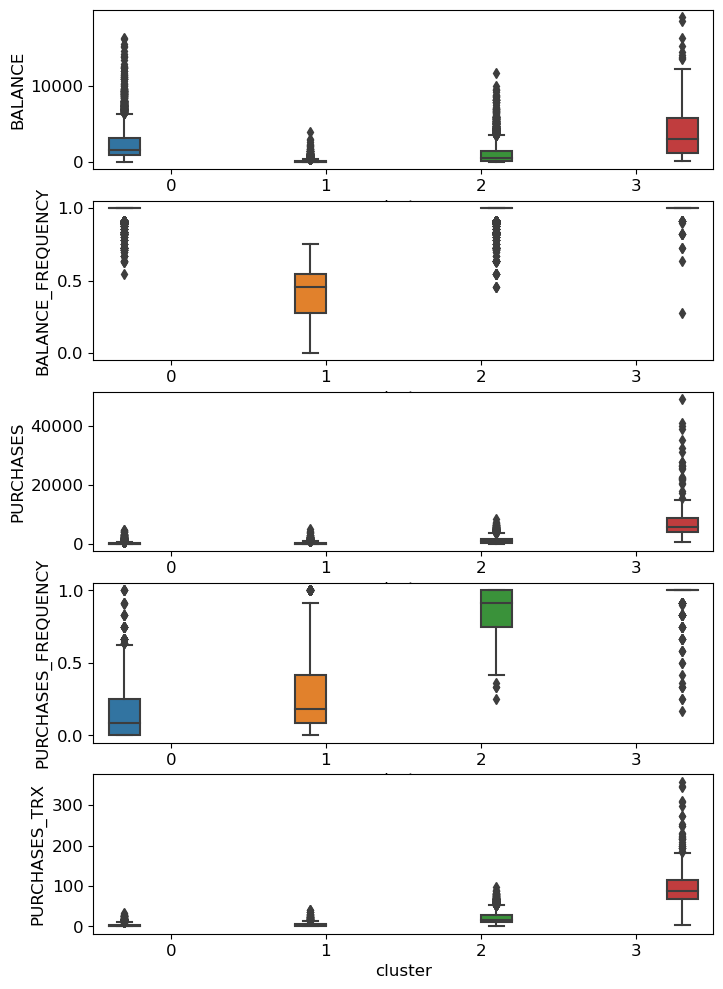

In [95]:
plt.rcParams['figure.figsize'] = (8,12)
fig, axes = plt.subplots(5,1)
for ax, col in zip(axes, df.drop(columns=['CUST_ID', 'cluster']).columns):
    sns.boxplot(x='cluster', y=col, hue='cluster', data=df, ax=ax,)
    ax.legend().remove()
plt.show()

In [96]:
# prac 4
Kmodel.predict(ss.transform([[3000,1,6000,1,100]]))

array([3], dtype=int32)

In [98]:
# prac 5
print("""
군집 0을 메인 타겟. 
- 전체 39%의 많은 수
- 구매계좌 잔액, 계좌 업데이트 빈도지수가 높아 구매력이 높은 집단
- 하지만 구매액, 구매빈도가 낮은 이유는 군집들이 필요로 하는 제품이 부족하거나 프로모션 부족 혹은 구매과정 동선의 부족이 있을 수 있다
- 이를 위하여, 제품 라인업 보충하고, 동선을 확인하거나 프로모션 진행 추천
""")


군집 0을 메인 타겟. 
- 전체 39%의 많은 수
- 구매계좌 잔액, 계좌 업데이트 빈도지수가 높아 구매력이 높은 집단
- 하지만 구매액, 구매빈도가 낮은 이유는 군집들이 필요로 하는 제품이 부족하거나 프로모션 부족 혹은 구매과정 동선의 부족이 있을 수 있다
- 이를 위하여, 제품 라인업 보충하고, 동선을 확인하거나 프로모션 진행 추천

